In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/danielwat/Documents/Python/Coursera/EDHEC/data/Portfolios_Formed_on_ME_monthly_EW.csv", 
                 index_col=0, na_values = -99.99)

In [3]:
df.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [4]:
df.index = pd.to_datetime(df.index, format = "%Y%m")

In [5]:
df.index = df.index.to_period("M")

In [6]:
df.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1926-08,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
1926-09,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
1926-10,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
1926-11,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [7]:
returns = df[["Lo 20","Hi 20"]]

In [8]:
returns = returns/100

In [9]:
totalreturn = ((returns+1).cumprod())-1
totalreturn

,Lo 20,Hi 20
1926-07,-0.005700,0.033300
1926-08,0.032481,0.057376
1926-09,0.027525,0.056424
1926-10,-0.006280,0.025260
1926-11,-0.011746,0.057658
...,...,...
2018-08,664399.279434,6878.227241
2018-09,650845.513734,6891.297773
2018-10,582376.460489,6380.578508
2018-11,566186.367087,6539.479813


In [10]:
(returns["Lo 20"]+1).prod()-1

482560.4929684381

<AxesSubplot:>

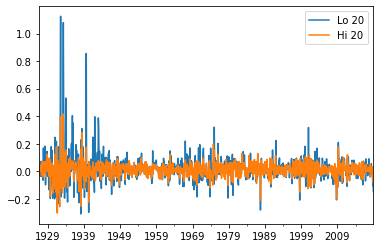

In [11]:
returns.plot()

In [12]:
(returns+1).prod()**(12/1110)-1 #annualized return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [13]:
monthly_volatility = returns.std(ddof=0)

In [14]:
annual_volatility = monthly_volatility*np.sqrt(12)

In [15]:
annual_volatility

Lo 20    0.336550
Hi 20    0.195028
dtype: float64

In [16]:
import seaborn as sn

In [17]:
returns9915 = returns.loc["1999":"2016"]

In [18]:
returns9915

,Lo 20,Hi 20
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2016-08,0.0320,-0.0006
2016-09,0.0341,0.0043
2016-10,-0.0702,-0.0220
2016-11,0.0896,0.0502


In [19]:
returns9915.std(ddof=0)

Lo 20    0.065277
Hi 20    0.048939
dtype: float64

In [20]:
returns9915.std(ddof=0)*np.sqrt(12) #annual volatility

Lo 20    0.226126
Hi 20    0.169528
dtype: float64

In [21]:
tr9915 = (returns9915+1).prod()-1

In [22]:
tr9915

Lo 20    6.400131
Hi 20    2.201430
dtype: float64

In [23]:
mr9915 = (tr9915+1)**(1/204)-1

In [24]:
ar9915 = (mr9915+1)**(12)-1

In [25]:
ar9915

Lo 20    0.124946
Hi 20    0.070844
dtype: float64

In [26]:
wealthlo20 = 1000*(returns9915["Lo 20"]+1).cumprod()
wealthlo20 = pd.DataFrame(wealthlo20)

<AxesSubplot:>

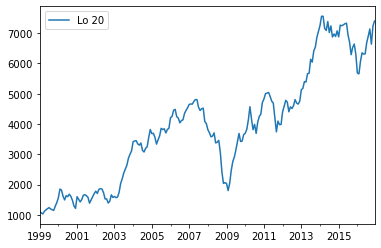

In [27]:
wealthlo20.plot()

In [28]:
peakslo20 = wealthlo20.cummax()
peakslo20 = pd.DataFrame(peakslo20)

<AxesSubplot:>

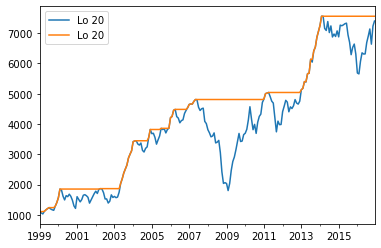

In [29]:
ax = wealthlo20.plot()
peakslo20.plot(ax = ax)

In [30]:
drawdown = (wealthlo20 - peakslo20)/peakslo20

<AxesSubplot:>

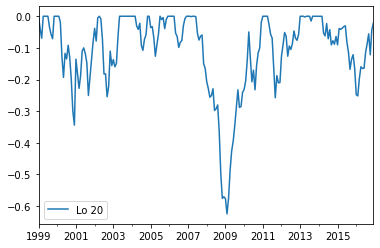

In [31]:
drawdown.plot()

In [32]:
drawdown.min()

Lo 20   -0.624809
dtype: float64

In [33]:
wealthhi20 = (returns9915["Hi 20"]+1).cumprod()

In [34]:
peakshi20 = wealthhi20.cummax()

<AxesSubplot:>

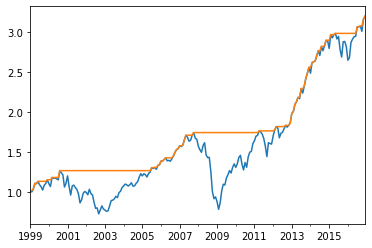

In [35]:
peakshi20.plot(ax = wealthhi20.plot())

In [36]:
drawdownhi20 = (wealthhi20 - peakshi20)/peakshi20

<AxesSubplot:>

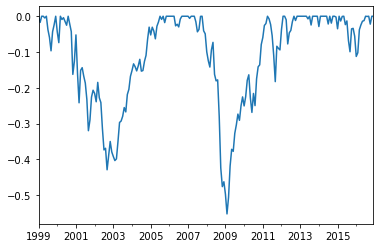

In [37]:
drawdownhi20.plot()

In [38]:
drawdownhi20.min()

-0.5527349978713653

In [39]:
drawdownhi20.idxmin()

Period('2009-02', 'M')

In [40]:
hfi = pd.read_csv("/Users/danielwat/Documents/Python/Coursera/EDHEC/data/edhec-hedgefundindices.csv", 
                 index_col = 0)

In [41]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
31/01/1997,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
28/02/1997,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
31/03/1997,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
30/04/1997,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
31/05/1997,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [42]:
hfi.index = pd.to_datetime(hfi.index, format= "%d/%m/%Y")

In [43]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [44]:
hfi2009 = hfi["2009":]

In [45]:
hfisemid = hfi2009[hfi2009<0].std(ddof=0)

In [46]:
hfisemid

Convertible Arbitrage     0.668103
CTA Global                1.099578
Distressed Securities     0.949845
Emerging Markets          1.527598
Equity Market Neutral     0.518610
Event Driven              1.013464
Fixed Income Arbitrage    0.332054
Global Macro              0.507508
Long/Short Equity         1.213857
Merger Arbitrage          0.361121
Relative Value            0.571123
Short Selling             2.124006
Funds Of Funds            0.794842
dtype: float64

In [47]:
hfisemid.idxmax()

'Short Selling'

In [48]:
import scipy.stats

In [49]:
hfi2009.skew().idxmin()

'Equity Market Neutral'

In [50]:
hfi0018 = hfi["2000":"2019"]
hfi0018.tail()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2018-07-31,0.21,-0.58,0.93,0.40,-0.10,0.55,0.22,-0.14,0.67,-0.21,0.45,-0.52,0.18
2018-08-31,0.24,1.66,0.02,-2.77,0.04,0.11,0.17,-0.07,0.35,0.50,-0.02,-2.14,0.15
2018-09-30,0.34,-0.54,0.50,-1.10,-0.16,0.32,0.36,0.06,-0.23,0.28,0.18,0.36,-0.22
2018-10-31,-0.73,-3.14,-1.58,-3.15,-1.29,-2.57,-0.23,-0.96,-4.02,-0.80,-1.09,2.37,-2.69
2018-11-30,-0.68,-0.53,-1.93,1.20,-2.11,-0.34,-0.67,-0.87,-0.44,1.19,-0.63,-0.21,-0.71


In [51]:
hfi0018.kurtosis().idxmax()

'Fixed Income Arbitrage'

# Week 2

In [52]:
ind = pd.read_csv("/Users/danielwat/Documents/Python/Coursera/EDHEC/data/ind30_m_vw_rets.csv"
                  ,index_col=0)

In [53]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20
192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,2.17,2.02,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76
192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,2.41,2.25,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86
192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-0.11,-2.00,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49
192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.63,3.77,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00


In [54]:
ind.index = pd.to_datetime(ind.index, format = "%Y%m")

In [55]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07-01,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20
1926-08-01,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,2.17,2.02,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76
1926-09-01,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,2.41,2.25,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86
1926-10-01,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-0.11,-2.00,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49
1926-11-01,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.63,3.77,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00


In [56]:
ind.index = ind.index.to_period("M")

In [57]:
ind["Food "].quantile(q=0.25)

-1.31

In [58]:
hfi2000 = hfi["2000":]

In [59]:
hfi2000.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2000-01-31,2.27,1.28,0.88,0.77,0.75,0.88,0.41,0.21,0.75,1.43,1.73,4.27,1.69
2000-02-29,2.67,-0.22,4.21,5.28,2.53,3.46,0.97,4.08,6.99,2.39,1.85,-13.40,6.66
2000-03-31,2.43,-1.38,1.03,3.18,1.34,0.69,-0.61,-1.04,0.06,1.31,1.63,-2.30,0.39
2000-04-30,2.23,-2.41,-1.01,-5.41,1.68,-0.59,-0.06,-3.04,-2.01,1.88,0.92,10.28,-2.69
2000-05-31,1.49,1.14,-1.32,-4.33,0.62,-0.34,1.07,-0.70,-0.97,1.46,0.80,7.04,-1.22


In [60]:
from scipy.stats import norm

In [61]:
z = norm.ppf(0.01)

In [62]:
var_gaussian = -(hfi2000.mean()+z*hfi2000.std(ddof=0))

In [63]:
var_gaussian

Convertible Arbitrage      3.484471
CTA Global                 5.033613
Distressed Securities      3.143018
Emerging Markets           5.807041
Equity Market Neutral      1.477190
Event Driven               3.085309
Fixed Income Arbitrage     1.951918
Global Macro               2.461907
Long/Short Equity          3.942044
Merger Arbitrage           1.535518
Relative Value             2.160459
Short Selling             10.213030
Funds Of Funds             2.938540
dtype: float64

In [64]:
skewness = hfi2000.skew()
kurtosis = hfi2000.kurtosis()

In [65]:
z = (z + 
     (z**2 - 1)*skewness/6 + 
     (z**3 - 3*z)*(kurtosis-3)/24 - 
     (2*z**3- 5*z)*(skewness**2)/36)

In [66]:
var_modified = -(hfi2000.mean()+z*hfi2000.std(ddof=0))

In [67]:
var_modified #conner fisher var

Convertible Arbitrage     9.319132
CTA Global                3.052093
Distressed Securities     3.857289
Emerging Markets          6.812934
Equity Market Neutral     3.649090
Event Driven              3.506643
Fixed Income Arbitrage    6.043963
Global Macro              1.417038
Long/Short Equity         3.839137
Merger Arbitrage          1.544995
Relative Value            4.150692
Short Selling             6.869477
Funds Of Funds            3.949437
dtype: float64

In [68]:
-np.percentile(hfi2000, 1, axis=0)/100 #var historic

array([0.031674, 0.050938, 0.042642, 0.065496, 0.0198  , 0.03854 ,
       0.030748, 0.022632, 0.04506 , 0.022654, 0.021788, 0.107684,
       0.0272  ])

In [69]:
ind = ind/100

In [70]:
ind.columns = ind.columns.str.strip()

In [71]:
returns1317 = ind["2013":"2017"]

In [72]:
returns1317 = returns1317[["Books","Steel","Oil","Mines"]]
returns1317

,Books,Steel,Oil,Mines
2013-01,0.0513,0.0428,0.0788,0.0059
2013-02,-0.0654,-0.0268,0.0052,-0.0756
2013-03,0.0778,0.0210,0.0209,0.0091
2013-04,-0.0029,-0.0441,-0.0129,-0.1057
2013-05,0.0479,0.0384,0.0307,0.0022
2013-06,0.0246,-0.0472,-0.0211,-0.0959
2013-07,0.1207,0.0697,0.0496,0.0002
2013-08,-0.0488,-0.0275,-0.0193,0.0459
2013-09,0.0626,0.0835,0.0189,0.0116
2013-10,0.0718,0.0838,0.0472,0.0534


In [73]:
cov1317 = returns1317.cov()

In [74]:
def portfolio_return(weights, returns):
    return weights.T @ returns

def portfolio_vol(weights, cov):
    return (weights.T @ cov @ weights)**0.5

In [75]:
from scipy.optimize import minimize

In [76]:
def minimize_vol(target_return, expected_return, cov):
    n = expected_return.shape[0]
    initialguess = np.repeat(1/n, n)
    bounds = ((0.0,1.0),)*n
    return_is_target = {
        'type': 'eq',
        'args': (expected_return,),
        'fun': lambda weights, expected_return: target_return - portfolio_return(weights, expected_return)
    }
    weights_equal_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) -1
    }
    answer = minimize(portfolio_vol, 
                       initialguess, 
                       args=(cov,),
                       method = "SLSQP",
                       options = {'disp': False}, 
                       constraints = (return_is_target,weights_equal_1),
                       bounds = bounds
                      )
    return answer.x

In [77]:
annualized_returns1317 = (returns1317+1).prod()**(12/60)-1
annualized_vol1317 = returns1317.std(ddof=0)*np.sqrt(12)

In [78]:
minimize_vol(0.05, annualized_returns1317, cov1317)
#minimized portfolio volatility weight at each point

array([0.38593721, 0.        , 0.49961795, 0.11444484])

In [79]:
def plot_efficient_frontier(number_of_point, expected_returns, cov):
    def optimal_weights(number_of_points, expected_returns, cov):
        returns = np.linspace(expected_returns.min(),
                              expected_returns.max(), 
                              number_of_points
                             )
        weights = [minimize_vol(i, expected_returns, cov) for i in returns]
        return weights
    weights = optimal_weights(number_of_point,expected_returns, cov)
    returns = [portfolio_return(w, expected_returns) for w in weights]
    vol = [portfolio_vol(w, cov) for w in weights]
    efficient_frontier = pd.DataFrame({
        "Returns": returns,
        "Volatility": vol
    })
    return efficient_frontier.plot.line(x = "Volatility", 
                                         y = "Returns", 
                                         style = '.-'
                                        )

<AxesSubplot:xlabel='Volatility'>

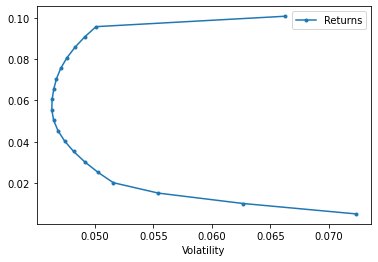

In [80]:
plot_efficient_frontier(20, annualized_returns1317, cov1317)

In [81]:
#MSR Weight
def maximized_sharpe_ratio(riskfree_rate, expected_return, cov):
    n = expected_return.shape[0]
    initialguess = np.repeat(1/n, n)
    bounds = ((0.0,1.0),)*n
    weights_equal_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) -1
    }
    def negativesharperatio(weights, expected_return, riskfree_rate, cov):
        r = portfolio_return(weights, expected_return)
        vol = portfolio_vol(weights, cov)
        return -(r-riskfree_rate)/vol
    answer = minimize(negativesharperatio, 
                       initialguess, 
                       args=(expected_return, riskfree_rate, cov,),
                       method = "SLSQP",
                       options = {'disp': False}, 
                       constraints = (weights_equal_1),
                       bounds = bounds
                      )
    return answer.x

In [82]:
weight_msr = maximized_sharpe_ratio(0.1, annualized_returns1317, cov1317)
return_msr = portfolio_return(weight_msr, annualized_returns1317)
vol_msr = portfolio_vol(weight_msr, cov1317)

In [83]:
#GMV Weight
def global_minimum_volatility(cov):
    return maximized_sharpe_ratio(0, np.repeat(1, cov.shape[0]), cov)

In [84]:
weights_gmv = global_minimum_volatility(cov1317)
vol_gmv = portfolio_vol(weights_gmv, cov1317)
returns_gmv = portfolio_return(weights_gmv, annualized_returns1317)

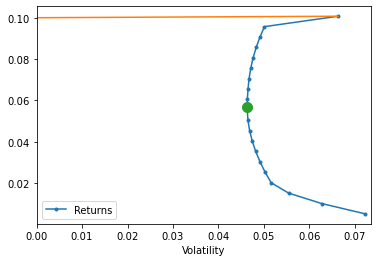

In [85]:
ax = plot_efficient_frontier(20, annualized_returns1317, cov1317)
ax.set_xlim(left = 0)
ax.plot([0,vol_msr], [0.1,return_msr])
ax.plot([vol_gmv], [returns_gmv], marker = 'o', markersize = 10)

In [86]:
weight_msr

array([0.00000000e+00, 1.00000000e+00, 2.08166817e-17, 6.01949046e-16])

In [87]:
weights_gmv

array([0.47702487, 0.        , 0.43411203, 0.0888631 ])

In [88]:
returns1317.columns[0]

'Books'

In [89]:
ind18 = ind["2018":]
ind18 = ind18[["Books","Steel","Oil","Mines"]]
annual_return18 = (ind+1).prod()**(12/12)-1
cov18 = ind18.cov()
vol_msr = portfolio_vol(weight_msr, cov18)
annual_volatility_msr = vol_msr*np.sqrt(12)
annual_volatility_msr

0.21983988181484188

In [90]:
vol_gmv = portfolio_vol(weights_gmv, cov18)
annual_volatility_gmv = vol_gmv*np.sqrt(12)
annual_volatility_gmv

0.18973734520184568